# Enter Dogs v Cat Redux


In [1]:
%matplotlib inline

path = "data/sample/"
#path = "data/"

import utils; reload(utils)
from utils import *
#from glob import glob

from shutil import copyfile

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [2]:
import numpy as np

In [3]:
batch_size=64

To Do:
1. Create validation set and sample 
2. move to separate dirs fro each set
3. finetune and train
4. submit

# Create validation set and sample




In [4]:
%cd data

/home/ubuntu/courses/deeplearning1/kaggle/data


In [5]:
#%cd train
#%cd train/dogs
%cd train/cats
# because I already moved all of my files into its own category already

/home/ubuntu/courses/deeplearning1/kaggle/data/train/cats


In [6]:
#%mkdir ../valid
%mkdir ../../valid

mkdir: cannot create directory ‘../../valid’: File exists


In [6]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], '../../valid/' + shuf[i])

In [9]:
%mkdir ../../sample
%mkdir ../../sample/train
%mkdir ../../sample/valid

mkdir: cannot create directory ‘../../sample’: File exists


In [7]:
gl = glob('*.jpg')
shuf = np.random.permutation(gl)
for i in range(200): copyfile(shuf[i], '../../sample/train/' + shuf[i])

In [8]:
%cd ../../valid

/home/ubuntu/courses/deeplearning1/kaggle/data/valid


In [9]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], '../sample/valid/' + shuf[i])

# Move to separate dirs for each set
Move the dogs and cats in each directory into its corresponding directory

In [25]:
%cd ../train

/home/ubuntu/courses/deeplearning1/kaggle/data/train


In [27]:
%cd ../valid

/home/ubuntu/courses/deeplearning1/kaggle/data/valid


In [20]:
%cd ../sample/train

[Errno 2] No such file or directory: '../sample/train'
/home/ubuntu/courses/deeplearning1/kaggle/data/sample/valid


In [13]:
%cd ../valid

/home/ubuntu/courses/deeplearning1/kaggle/data/sample/valid


In [28]:
%mkdir cats
%mkdir dogs

In [29]:
%mv cat*.jpg cats/

In [30]:
%mv dog*.jpg dogs/

# Prediction Calculation
Go back to the directory of this execution file otherwise can't load vgg


In [33]:
%cd ../

/home/ubuntu/courses/deeplearning1/kaggle


In [4]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [45]:
path = "data/"
#path = "data/sample/"

In [46]:
vgg = Vgg16()

In [47]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
#val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)
vgg.finetune(batches)





Found 21000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [48]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
21000/21000 [==============================] - 656s - loss: 0.1258 - acc: 0.9662 - val_loss: 0.0688 - val_acc: 0.9818


In [49]:
vgg.model.save_weights(path+'results/ft3.h5')

# Output results and Submit

In [131]:
batch_size=64
#batch_size=4
class_mode=None
img_size_expected=(244,244)

In [137]:
test_batches = vgg.get_batches(path + 'test',class_mode=class_mode,batch_size=batch_size*2,shuffle=False)


Found 12500 images belonging to 1 classes.


In [138]:
import math

def predict_labels(model,test_batches,batch_size):
    final_preds = []
    final_index = []
    final_classes = []
    print ('predicting batch#:')
    for i in range(0,int(math.ceil(test_batches.nb_sample/batch_size)),1):
        print ( str(i) + ',')
        imgs = next(test_batches)
        preds, pindex, pclasses= model.predict(imgs,True)
        
        
        final_preds = final_preds+preds.tolist()
        final_index = final_index+pindex.tolist()
        final_classes =final_classes+pclasses
        
    return final_preds, final_index, final_classes
   
print ('start predict labels \n')
final_preds, final_index, final_classes = predict_labels(model=vgg,test_batches=test_batches,batch_size=batch_size)

####### new one
#final_preds = vgg.predict_generator(test_batches, test_batches.np_sample)
#
        
print ('done')

start predict labels 

predicting batch#:
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,
46,
47,
48,
49,
50,
51,
52,
53,
54,
55,
56,
57,
58,
59,
60,
61,
62,
63,
64,
65,
66,
67,
68,
69,
70,
71,
72,
73,
74,
75,
76,
77,
78,
79,
80,
81,
82,
83,
84,
85,
86,
87,
88,
89,
90,
91,
92,
93,
94,
95,
96,
97,
98,
99,
100,
101,
102,
103,
104,
105,
106,
107,
108,
109,
110,
111,
112,
113,
114,
115,
116,
117,
118,
119,
120,
121,
122,
123,
124,
125,
126,
127,
128,
129,
130,
131,
132,
133,
134,
135,
136,
137,
138,
139,
140,
141,
142,
143,
144,
145,
146,
147,
148,
149,
150,
151,
152,
153,
154,
155,
156,
157,
158,
159,
160,
161,
162,
163,
164,
165,
166,
167,
168,
169,
170,
171,
172,
173,
174,
175,
176,
177,
178,
179,
180,
181,
182,
183,
184,
185,
186,
187,
188,
189,
190,
191,
192,
193,
194,
done


In [ ]:
 print ('getting patches and prediction batch#:')
t_batches, t_preds = vgg.test(path+'test', batch_size = batch_size*2)


In [139]:
test_predictions = np.asarray(final_preds)
test_labels_list = test_predictions.tolist()


test_indexes = np.asarray(final_index)
test_index_list = test_indexes.tolist()


#str1 = ' - '.join(str(e) for e in test_labels_list)
#print (str1)


#str2 = ' - '.join(str(e) for e in test_index_list)
#print (str2)

print ('done')

save_array(path+'results/test_preds.dat',test_predictions)

#save_array(path+'results/test_preds.dat',final_preds)

done


In [140]:
print ('getting filenames')
#print the filenames
test_image_ids=test_batches.filenames   


#str3 = ' - '.join(str(e) for e in test_image_ids)
#print (str3)
print ('done')


getting filenames
done


In [54]:
save_array(path+'results/filesnames.dat', test_image_ids)

In [152]:
#put the labels in with the pictures
print ('put the labels in with the pictures')

test_image_ids=test_batches.filenames 
test_id_labels = []
for index,(img_id,img_label) in enumerate(zip(test_image_ids,test_labels_list)):
    test_id_labels = test_id_labels + [[int(img_id.split('/')[1].split('.')[0]),img_label]]
    
str3 = ' - '.join(str(e) for e in test_id_labels)
print (str3)    

print ('done')

put the labels in with the pictures
[9292, 1.0] - [12026, 0.9639251828193665] - [9688, 0.9999984502792358] - [4392, 1.0] - [779, 0.9999998807907104] - [2768, 0.9999997615814209] - [2399, 1.0] - [12225, 0.9962474703788757] - [10947, 1.0] - [1780, 1.0] - [11631, 0.9999994039535522] - [8478, 1.0] - [7940, 1.0] - [5102, 1.0] - [1704, 1.0] - [5967, 0.9999998807907104] - [1261, 1.0] - [11882, 0.9999983310699463] - [3237, 1.0] - [10222, 0.9999370574951172] - [10854, 0.9999996423721313] - [6810, 0.9825806021690369] - [8615, 0.9999998807907104] - [6014, 0.9999946355819702] - [7161, 0.9999383687973022] - [7934, 1.0] - [6549, 1.0] - [2715, 1.0] - [6139, 0.9999998807907104] - [6873, 1.0] - [4470, 1.0] - [9417, 1.0] - [8911, 0.9999990463256836] - [878, 0.9765535593032837] - [10159, 0.9999722242355347] - [8553, 1.0] - [7897, 0.9999698400497437] - [2271, 1.0] - [6094, 1.0] - [10906, 0.9999940395355225] - [6945, 0.9678279161453247] - [9578, 0.9999932050704956] - [1839, 1.0] - [11121, 0.607954859733581

In [155]:
#sort the array
print ('sorting array \n')
#test_id_labels_array = np.clip(np.array(test_id_labels),0.05, 0.98)
#test_id_labels_array = np.clip(np.array(test_id_labels[:,1]),0.04, 0.98)
test_id_labels_array = np.array(test_id_labels)
test_id_labels_array_sorted = test_id_labels_array[test_id_labels_array[:,0].argsort()]
test_id_labels_sorted = test_id_labels_array_sorted.tolist()

"""""

str3 = ' - '.join(str(e) for e in test_id_labels_sorted)
print (str3)   


for i in range(0,len(test_id_labels_sorted)):
    id_label = test_id_labels_sorted[i]
    
    #'{},{:.1f}'.format(filename, preds[i, idx])
    print (str(id_label[0]))
    print (str(id_label[1]))
    print('\n')
"""""
print('done')

sorting array 

done


In [156]:
test_id_labels_sorted[:5]

[[1.0, 0.9999998807907104], [2.0, 1.0], [3.0, 1.0], [4.0, 1.0], [5.0, 1.0]]

In [157]:
print ('writing array to file \n')

import csv

## write it out to the file
with open('kaggle_catsdogs.csv', 'w') as csvfile:
        # assign Kaggle column names
        fieldnames = ['id', 'label']
        
         # instaniate DictWriter to write to csv
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        # write colnum names to csv
        writer.writeheader()
         #loop to format predictions and files id
           
        for i in range(0,len(test_id_labels_sorted)):
                
                id_label = test_id_labels_sorted[i] 
                
                
                
                #writer.writerow({'id': ('{:.0f}'.format(id_label[0])), 'label': ('{:.1f}'.format(id_label[1]))})
                writer.writerow({'id': ('{:.0f}'.format(id_label[0])), 'label': id_label[1]})
                #writer.writerow({'id': ('{:.0f}'.format(id_label[0])), 'label': np.clip(id_label[1],0.05,0.98)})
                #writer.writerow({'id': id_label[0], 'label': id_label[1]})
                
                
                

print ('done')

writing array to file 

done


# Following His Suggested Code


In [ ]:
#path = "data/sample/"
#path = "data/"

In [50]:
print ('start get test batches')
test_batches, preds = vgg.test(path+'test', batch_size = batch_size*2)
print ('done')


start get test batches
Found 12500 images belonging to 1 classes.
done


In [51]:
filenames = test_batches.filenames

In [52]:
print ('predictions')
preds[:5]

predictions


array([[  1.0000e+00,   6.3002e-12],
       [  9.9980e-01,   2.0052e-04],
       [  9.9996e-01,   3.8758e-05],
       [  1.0000e+00,   9.3446e-13],
       [  2.1350e-08,   1.0000e+00]], dtype=float32)

In [53]:

print ('filenames')
filenames[:5]

filenames


['unknown/9292.jpg',
 'unknown/12026.jpg',
 'unknown/9688.jpg',
 'unknown/4392.jpg',
 'unknown/779.jpg']

In [54]:
save_array(path+'results/test_preds.dat', preds)
save_array(path+'results/filenames.dat', filenames)

In [55]:
preds = load_array(path+'results/test_preds.dat')
filenames = load_array(path+'results/filenames.dat')

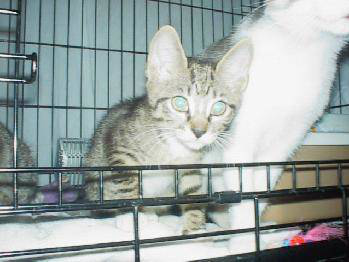

In [56]:
from PIL import Image
Image.open(path+'test/'+filenames[0])

In [57]:
isdog = preds[:,1]
isdog[:5]

array([  6.3002e-12,   2.0052e-04,   3.8758e-05,   9.3446e-13,   1.0000e+00], dtype=float32)

In [58]:
isdog = np.clip(preds[:,1], 0.02, 0.98)

In [59]:
#get the first 8 digit from the filenames until the . from the filenames to create the ids
ids = [int(f[8:f.find('.')]) for f in filenames]

#ids = [int(f.split('/')[1].split('.')[0]) for f in filenames]
print ('done')
ids[:5]
        


done


[9292, 12026, 9688, 4392, 779]

In [60]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  9.2920e+03,   2.0000e-02],
       [  1.2026e+04,   2.0000e-02],
       [  9.6880e+03,   2.0000e-02],
       [  4.3920e+03,   2.0000e-02],
       [  7.7900e+02,   9.8000e-01]])

In [61]:
np.savetxt('submission/subm3.csv', subm, fmt='%d,%.5f', header='id,label', comments='')

In [ ]:
# this creates a url to the file and download to the local computer
# then you can submit it from your local computer.
# otherwise you can ssh into your aws and use kg 
from IPython.display import FileLink
FileLink('data/submission/subm1.csv')